# Importing Librariers

In [1]:
#Importing Required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Transfering the file into dataset

In [2]:
#transferinc the file into dataframe
resumeDataSet = pd.read_csv('UpdatedResumeDataSet.csv' ,encoding='utf-8')
#creating a new column in dataset
resumeDataSet['cleaned_resume'] = ''
#displaying the frame
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


# Cleaning the resume column/Pre-Processing

In [3]:
#Creating a helper function to remove the URLs, hashtags, mentions, special letters, and punctuations
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resumeDataSet['cleaned_resume'] = resumeDataSet.Resume.apply(lambda x: cleanResume(x))
resumeDataSet.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


# Checking all the categories in file 

In [4]:
#Printing the categories.
print ("Displaying the distinct categories of resume -")
print (resumeDataSet['Category'].unique())

Displaying the distinct categories of resume -
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


# Checking number of categories in category column

In [5]:
#Checking the number of records per category
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (resumeDataSet['Category'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


# visualizing the number of categories in the dataset

visualizing the number of categories in the dataset


<AxesSubplot:xlabel='count', ylabel='Category'>

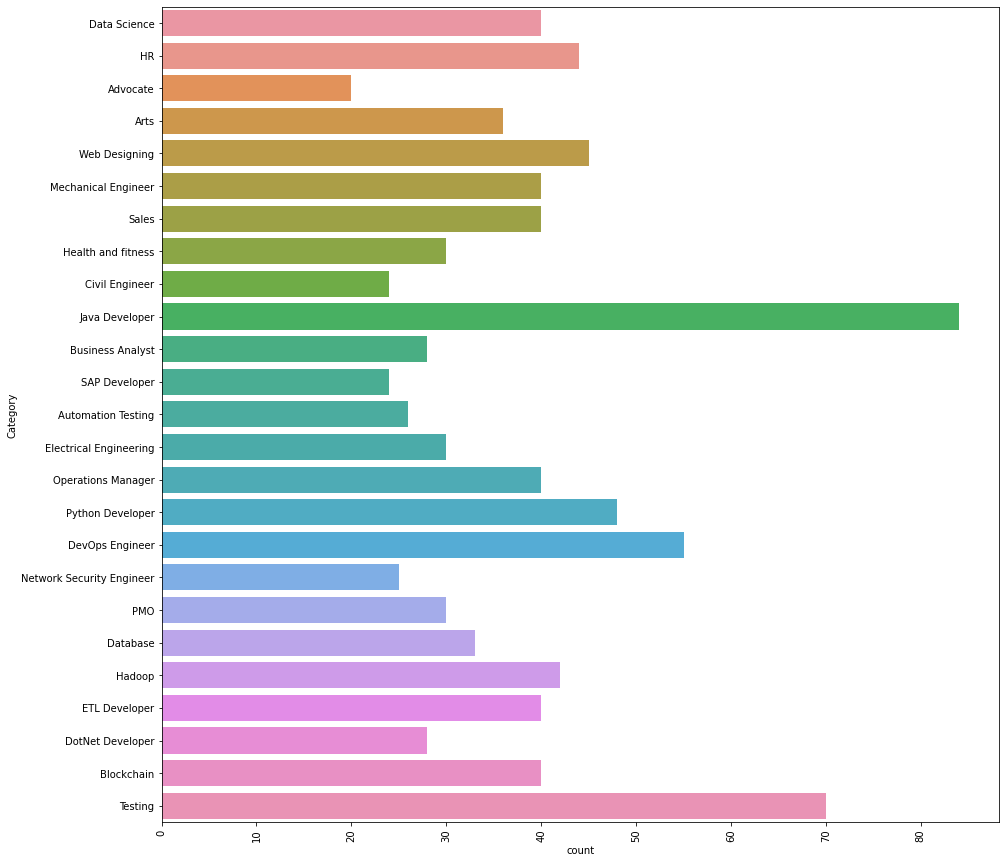

In [6]:
print("visualizing the number of categories in the dataset")
import seaborn as sns
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=resumeDataSet)

# visualizing the distribution of categories

visualizing the distribution of categories


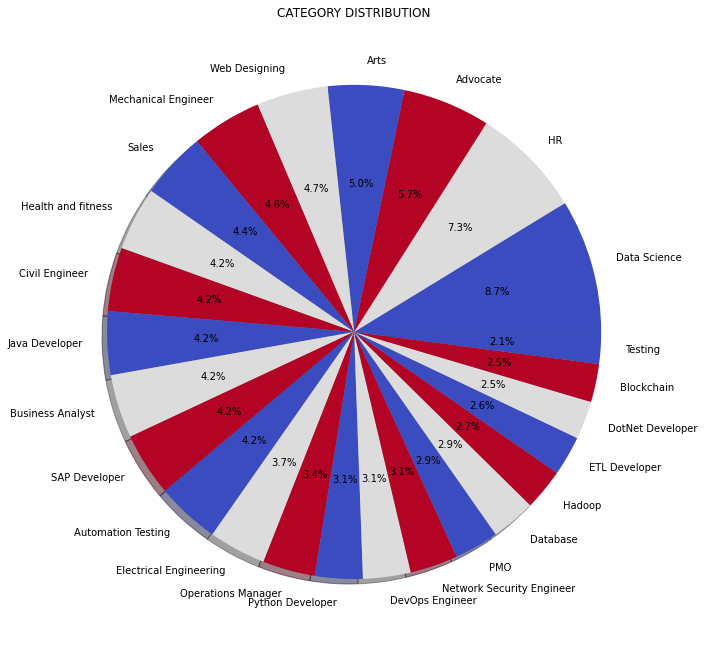

In [7]:
print("visualizing the distribution of categories")
from matplotlib.gridspec import GridSpec
targetCounts = resumeDataSet['Category'].value_counts()
targetLabels  = resumeDataSet['Category'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

# Checking WordCount

In [8]:
#checking word_count
resumeDataSet["word_count"] = resumeDataSet["cleaned_resume"].apply(lambda x: len(str(x).split(" ")))
resumeDataSet[["cleaned_resume","word_count"]].head()

,cleaned_resume,word_count
0,Skills Programming Languages Python pandas num...,653
1,Education Details May 2013 to May 2017 B E UIT...,164
2,Areas of Interest Deep Learning Control System...,268
3,Skills R Python SAP HANA Tableau SAP HANA SQL ...,945
4,Education Details MCA YMCAUST Faridabad Haryan...,62


# finding common skills

In [9]:
# finding common skills
freq_common = pd.Series(' '.join(resumeDataSet['cleaned_resume']).split()).value_counts()[:986]
freq_common

and             16516
the             10809
of               8594
to               7263
in               5276
                ...  
construction       68
meet               68
FTP                68
36                 68
credit             68
Length: 986, dtype: int64

# finding rare skills

In [10]:
# finding rare skills
rare = pd.Series(' '.join(resumeDataSet['cleaned_resume']).split()).value_counts()[-50:]
rare

CSL             1
92              1
Centrex         1
Subcon          1
Rehearsal       1
awards          1
Shadow          1
phases          1
iPhone          1
Comparative     1
Apple           1
ARIA            1
Root            1
NextGen         1
Cause           1
Prevention      1
Wearable        1
signoff         1
surveillance    1
CAPEX           1
exercises       1
Apr             1
BEST            1
76              1
Call            1
Sunnyvale       1
ZD              1
Ohio            1
Provides        1
cript           1
discounts       1
KMs             1
Sure            1
Schools         1
Complain        1
CXMT            1
Carolina        1
PMR             1
Wachovia        1
Biz             1
SQA             1
Dreamweaver     1
Gates           1
Share           1
BizTalk2006     1
Lets            1
MOSS            1
NUnit           1
CSAT            1
Significant     1
dtype: int64

# Downloding Stop_Words

In [12]:
#Downloading 'corpus' packages from nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\SANA
[nltk_data]     JALGAONKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Downloading PUNKT

In [13]:
#Downloading 'punkt' packages from nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\SANA
[nltk_data]     JALGAONKAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Checking WordCloud

[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('A', 84), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72)]


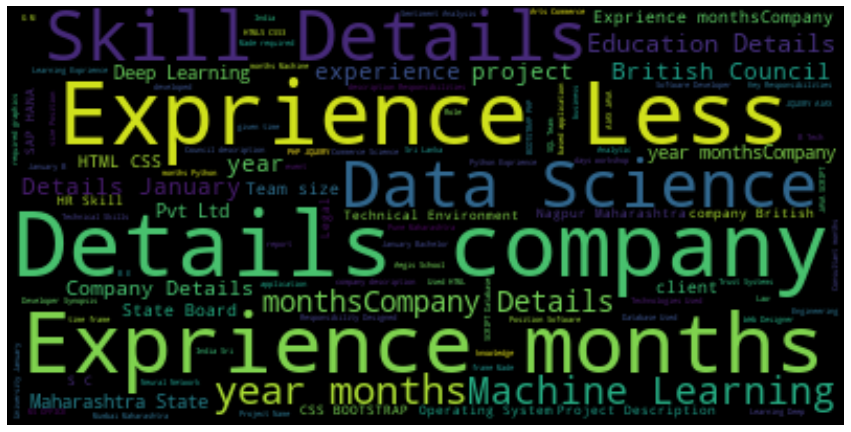

In [14]:
#A Wordcloud represents the most numbers of words larger and vice versa (as wordcloud is already installed directly importing it)
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resumeDataSet['Resume'].values
cleanedSentences = ""
for i in range(0,160):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

# Creating a list of categories

In [15]:
#create list of all categories
categories = np.sort(resumeDataSet['Category'].unique())
categories

array(['Advocate', 'Arts', 'Automation Testing', 'Blockchain',
       'Business Analyst', 'Civil Engineer', 'Data Science', 'Database',
       'DevOps Engineer', 'DotNet Developer', 'ETL Developer',
       'Electrical Engineering', 'HR', 'Hadoop', 'Health and fitness',
       'Java Developer', 'Mechanical Engineer',
       'Network Security Engineer', 'Operations Manager', 'PMO',
       'Python Developer', 'SAP Developer', 'Sales', 'Testing',
       'Web Designing'], dtype=object)

# Creating a new dataFrame for corpus & Category

In [16]:
# create new df for corpus and category
resumeDataSet_categories = [resumeDataSet[resumeDataSet['Category'] == category].loc[:, ['cleaned_resume', 'Category']] for category in categories]
resumeDataSet_categories

[                                        cleaned_resume  Category
 84   TECHNICAL QUALIFICATIONS Windows Ms OfficeEduc...  Advocate
 85   Education Details B Com LL B University of Cla...  Advocate
 86   Education Details LLB Dibrugarh University Adv...  Advocate
 87   Education Details November 2016 to January 201...  Advocate
 88   SKILLS Knows English as native speaker IELTS O...  Advocate
 89   QUALIFICATION Introduction to Computer EXTRAEd...  Advocate
 90   Skills Natural Languages Proficient in English...  Advocate
 91   Skills Legal Writing Efficient researcher Lega...  Advocate
 92   Good grasping quality and skillful work Educat...  Advocate
 93    Hard working Quick learnerEducation Details J...  Advocate
 94   TECHNICAL QUALIFICATIONS Windows Ms OfficeEduc...  Advocate
 95   Education Details B Com LL B University of Cla...  Advocate
 96   Education Details LLB Dibrugarh University Adv...  Advocate
 97   Education Details November 2016 to January 201...  Advocate
 98   SKIL

# number of records for each category, where class imbalanced is spotted easily

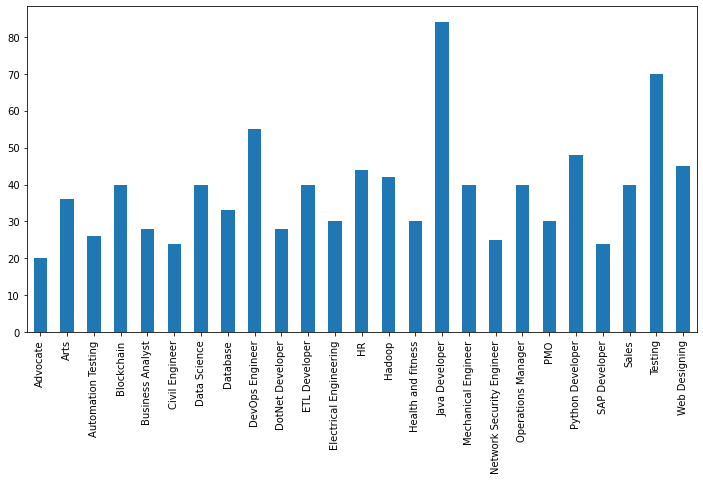

In [17]:
resumeDataSet['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

# Creating WordCloud from cleaned_resume on the basis of categories

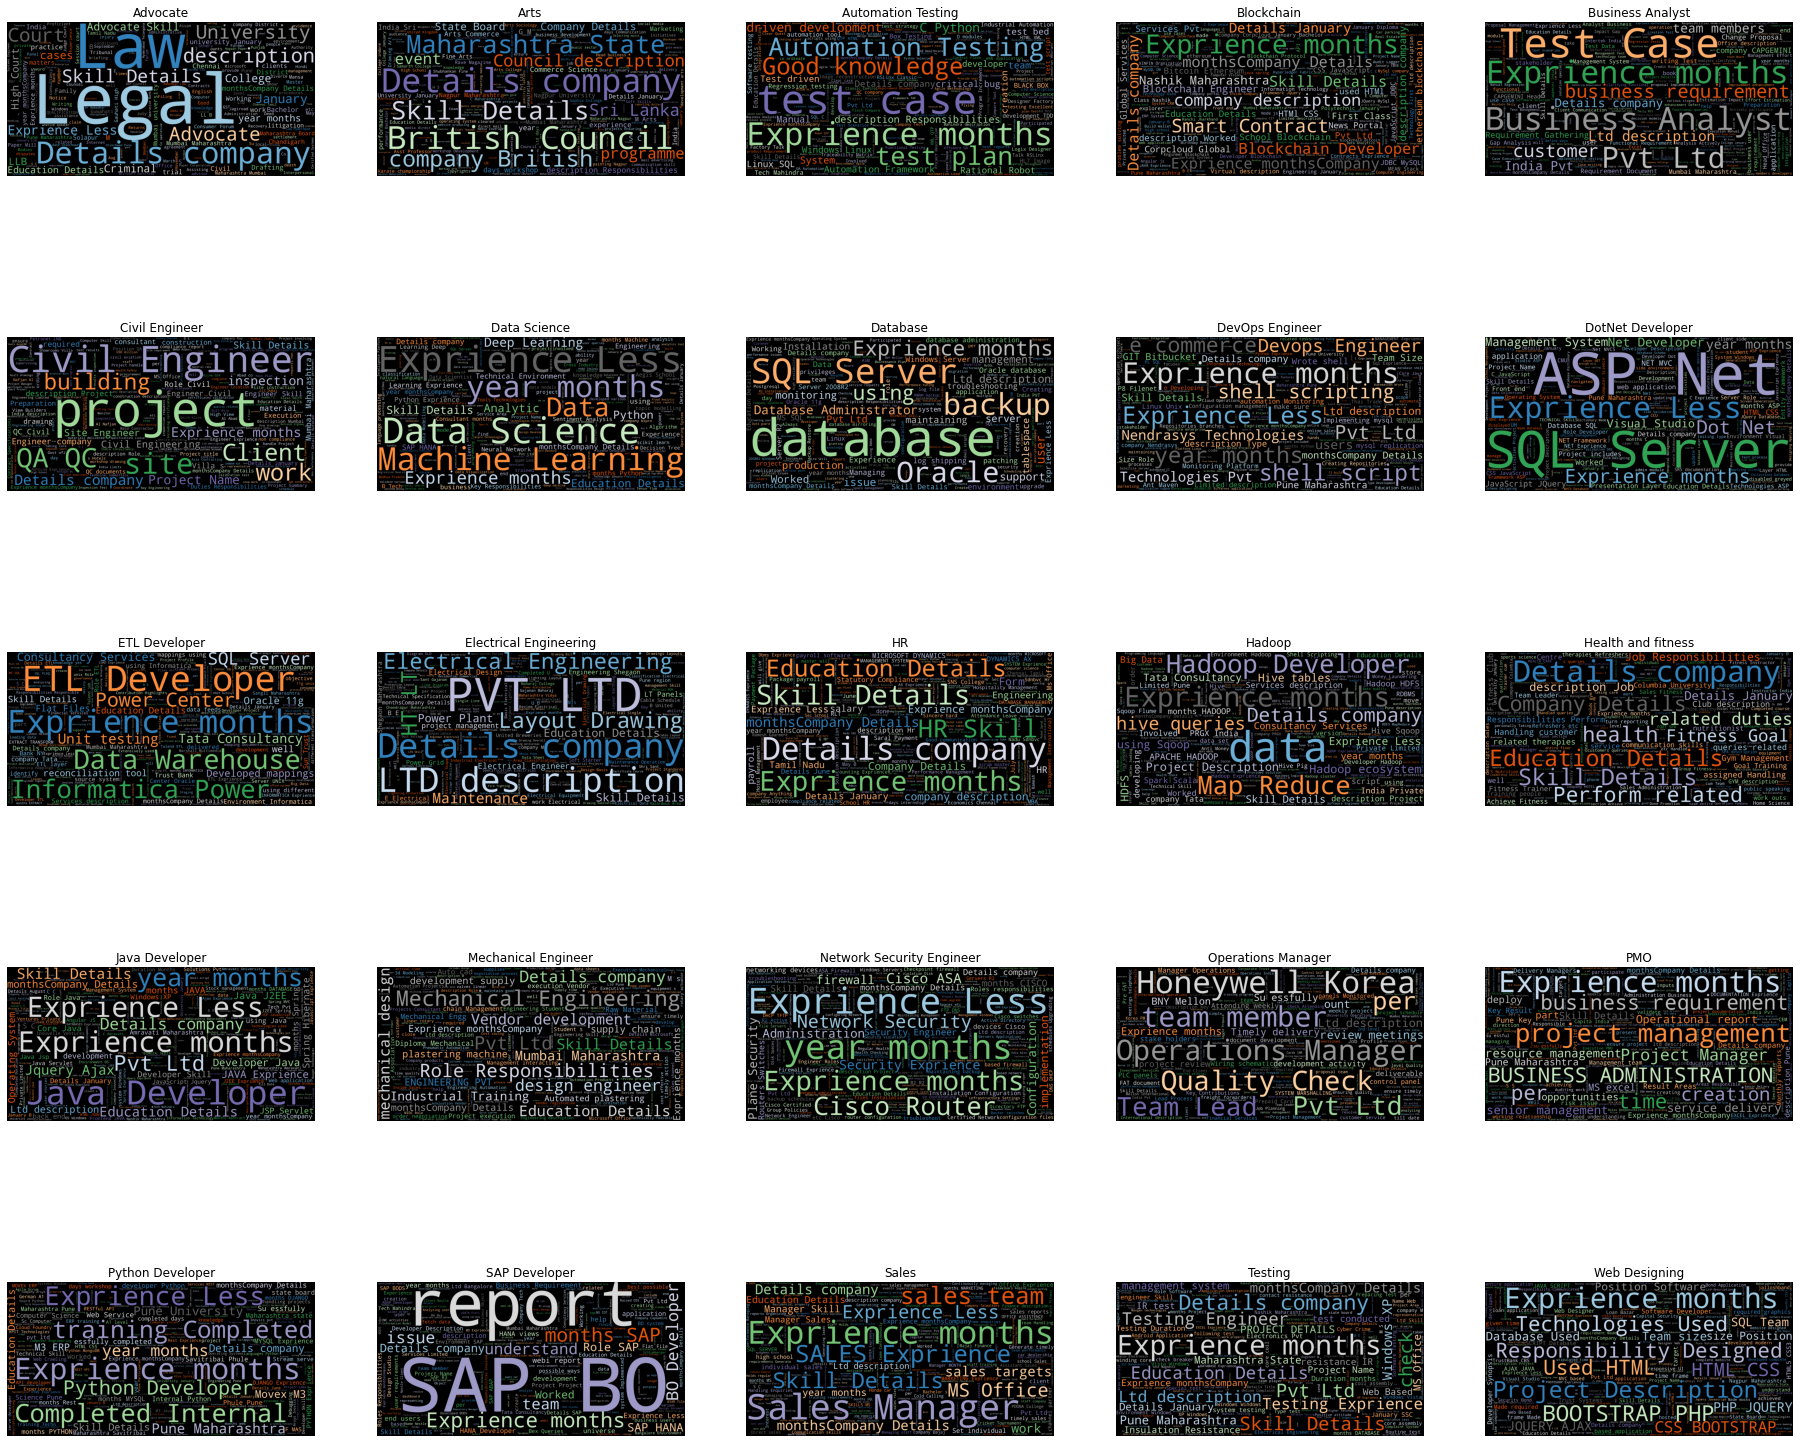

In [18]:
def wordcloud(resumeDataSet):
    txt = ' '.join(txt for txt in resumeDataSet['cleaned_resume'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap='tab20c'
    ).generate(txt)

    return wordcloud
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(resumeDataSet_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

# Creating Word Frequency Table

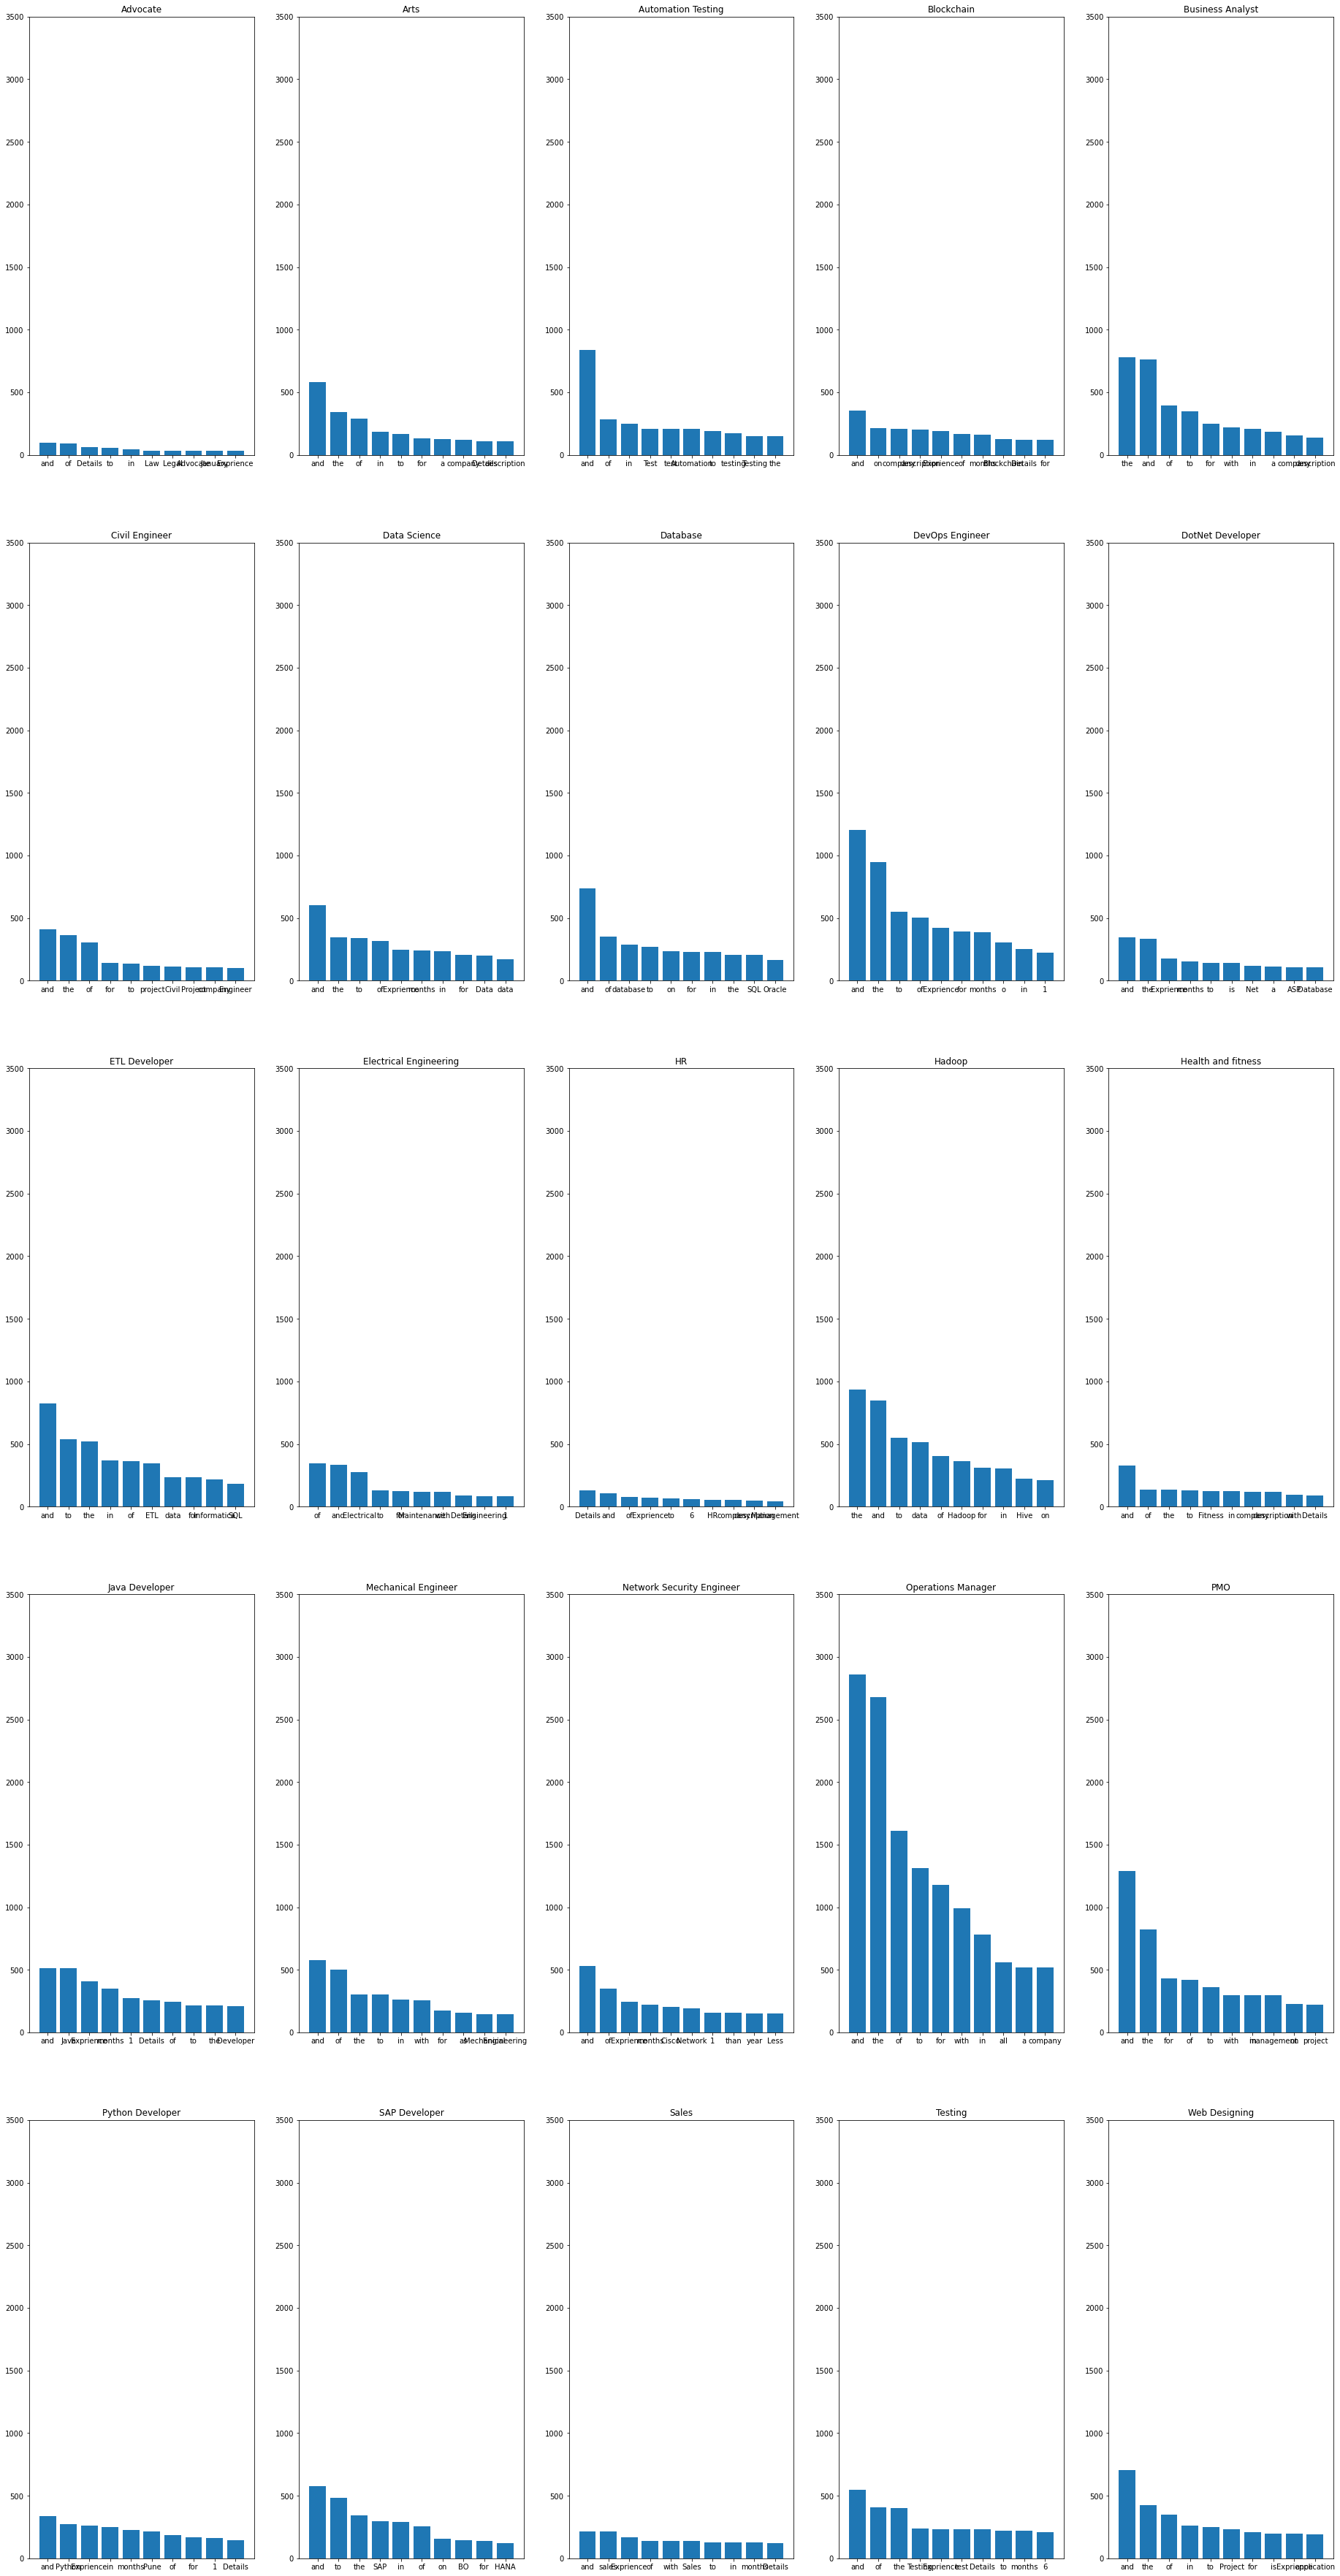

In [19]:
def wordfreq(resumeDataSet):
    count = resumeDataSet['cleaned_resume'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(resumeDataSet_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 3500)

plt.show()
plt.close()

# LabelEncoding and vectorizing

In [20]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resumeDataSet[i] = le.fit_transform(resumeDataSet[i])
resumeDataSet
resumeDataSet.Category.value_counts()
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
requiredText = resumeDataSet['cleaned_resume'].values
requiredTarget = resumeDataSet['Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)
print('Featuring Completed...........')

Featuring Completed...........


# Building KNNClassifier

In [21]:
#Model Building
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=0, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

(769, 1500)
(193, 1500)


# Showcasing Results

In [22]:
#Results
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("n Classification report for classifier %s:n%sn" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set: 0.99
n Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):n              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.

# Building Multinomial Naive Bayes

In [23]:
#Naive Bayes
clf = OneVsRestClassifier(MultinomialNB()).fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


Accuracy of MultinomialNB Classifier on training set: 0.99
Accuracy of MultinomialNB Classifier on test set: 0.97

 Classification report for classifier OneVsRestClassifier(estimator=MultinomialNB()):
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.75      1.00      0.86         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      0.78      0.88         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      1.0

# Building Random Forest

In [24]:
from sklearn import tree
from sklearn import ensemble
clf = OneVsRestClassifier(ensemble.RandomForestClassifier(n_estimators=100)).fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of Random Forest Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of Random Forest Classifier on training set: 1.00
Accuracy of Random Forest Classifier on test set: 1.00

 Classification report for classifier OneVsRestClassifier(estimator=RandomForestClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00

# Building ANN

# Installing Keras

In [26]:
!pip install keras

# Installing Tensorflow

In [33]:
!pip install tensorflow

# Importing Libraries essential for ANN

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

#Keras
import keras
import keras.backend as K
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.models import Model
from keras.initializers import he_uniform
from keras.optimizers import Adam
from keras import callbacks

#Disables deprecation warnings
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

# Splitting dataset into Training and Validation set.

In [58]:
#X_train, X_test, y_train, y_test = train_test_split(WordFeatures,requiredTarget,test_size=0.2,stratify=requiredTarget,random_state=42)
X = resumeDataSet['cleaned_resume']
y = resumeDataSet['Category']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((769,), (193,), (769,), (193,))

# Word Embedding

In [57]:
def tokenization(data):

  """This function creates the vocabulary index based on word frequency and 
  Transforms each text in texts to a sequence of integers and 
  also returns vocabulary length
  """

  tok = Tokenizer(char_level=False,split=' ')
  #this creates the dictionary
  tok.fit_on_texts(data)
  #this transforms the texts in to sequences of indices
  return tok.texts_to_sequences(data), len(tok.index_word.keys())

def padding(sequences_data,maxlen):

  """This function pads variable length sequences.The default padding value is 0.0"""

  return sequence.pad_sequences(sequences_data,maxlen=maxlen)

In [39]:
#Let's check how many maximum words on an average are there in the dataset
np.quantile(resumeDataSet["Category"],0.95)

23.0

In [70]:
#maxlen = 23
maxlen = 23.0
sequences_train, vocab_len = tokenization(X_train)
sequences_train_matrix = padding(sequences_train,maxlen)

AttributeError: module 'keras.preprocessing.sequence' has no attribute 'pad_sequences'

In [60]:
vocab_len

7585

# The training dataset contains 7585 Unique Vocabulary

In [61]:
sequences_test, _ = tokenization(X_test)
sequences_test_matrix = padding(sequences_test,maxlen)

AttributeError: module 'keras.preprocessing.sequence' has no attribute 'pad_sequences'

# Building LSTM Architecture

In [62]:
def build_model(input,LSTM_units,nb_classes,finalAct='sigmoid'):

    """This function Builds the LSTM Model using keras Functional API"""

    #Defining basic parameters
    embedding_input_dim = vocab_len
    embedding_output_dim = 200
    initializer = he_uniform(seed=200)
    
    #Input Layer, shape=15.0
    inputs = Input(name='inputs',shape=[input])
    #Embedding Layer
    layer = Embedding(embedding_input_dim+1,embedding_output_dim,input_length=input,
                      mask_zero=True,embeddings_initializer=initializer)(inputs)
    #LSTM Layer
    layer = LSTM(LSTM_units,kernel_initializer=initializer)(layer)
    #Classifier
    layer = Dense(units=64,name='FC1',kernel_initializer=initializer)(layer)
    layer = Activation('relu')(layer)
    #Dropout
    layer = Dropout(0.5)(layer)
    layer = Dense(nb_classes,name='Output_layer',kernel_initializer=initializer)(layer)
    #Final Output Layer
    layer = Activation(finalAct)(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [63]:
model = build_model(input=15,LSTM_units=100,nb_classes=1,finalAct='sigmoid')
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 15)]              0         
                                                                 
 embedding (Embedding)       (None, 15, 200)           1517200   
                                                                 
 lstm (LSTM)                 (None, 100)               120400    
                                                                 
 FC1 (Dense)                 (None, 64)                6464      
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 Output_layer (Dense)        (None, 1)                 65    

# Compiling the model

In [64]:
#Using Adam optimizer with an initial learning rate of 0.0001
opt=Adam(lr=0.001, beta_1=0.91, beta_2=0.999, epsilon=1e-08, decay=0)
#Compile the model
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

# Defining Callbacks

In [65]:
def myCallbacks():

    """This function returns a list of callbacks"""

    #Model Checkpoint
    file_path = r"/content/drive/My Drive/spamModel.h5"
    checkpoint = callbacks.ModelCheckpoint(file_path,monitor='val_acc',verbose=1,save_best_only=True,mode='auto')

    #ReduceLROnPlateau
    reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=5,min_lr=1e-30,cooldown=2,verbose=1)

    # EarlyStopping
    es = callbacks.EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

    return [checkpoint,reduce_lr, es]

# Training model using Keras .fit_generator()

In [66]:
def train_batch_generator(features, labels, batch_size):
  # Create empty arrays to contain batch of features and labels#
  batch_features = np.zeros((batch_size, 15, ))
  batch_labels = np.zeros((batch_size,))
  while True:
    for i in range(batch_size):
      # choose random index in features
      index = np.random.choice(len(features),1)
      batch_features[i] = features[index]
      batch_labels[i] = labels[index]
    yield batch_features, batch_labels

In [67]:
def validation_batch_generator(features, labels, batch_size):
  # Create empty arrays to contain batch of features and labels#
  batch_features = np.zeros((batch_size, 15, ))
  batch_labels = np.zeros((batch_size,))
  while True:
    for i in range(batch_size):
      # choose random index in features
      index = np.random.choice(len(features),1)
      batch_features[i] = features[index]
      batch_labels[i] = labels[index]
    yield batch_features, batch_labels

In [69]:
#Defining class weights as the dataset is heavily imbalance
class_weight = class_weight.compute_class_weight('balanced',classes=np.unique(y_train),y_train)
class_weight_dict = dict(enumerate(class_weight))
class_weight_dict

{0: 1.9225,
 1: 1.0606896551724139,
 2: 1.4647619047619047,
 3: 0.96125,
 4: 1.3981818181818182,
 5: 1.6189473684210527,
 6: 0.96125,
 7: 1.1830769230769231,
 8: 0.6990909090909091,
 9: 1.337391304347826,
 10: 0.96125,
 11: 1.2816666666666667,
 12: 0.8788571428571429,
 13: 0.9047058823529411,
 14: 1.2816666666666667,
 15: 0.4591044776119403,
 16: 0.96125,
 17: 1.538,
 18: 0.96125,
 19: 1.2816666666666667,
 20: 0.8094736842105263,
 21: 1.6189473684210527,
 22: 0.96125,
 23: 0.5492857142857143,
 24: 0.8544444444444445}

# Training

In [ ]:
#Training batch size
tbs = 512
#validation batch size
vbs = 64
training_generator = train_batch_generator(sequences_train_matrix, np.asarray(y_train),tbs)
validation_generator = validation_batch_generator(sequences_test_matrix, np.asarray(y_test),vbs)

In [ ]:
epochs = 30
steps_per_epoch = int(sequences_train_matrix.shape[0]/512)
validation_steps = int(sequences_test_matrix.shape[0]/64)

In [ ]:
history = model.fit_generator(generator=training_generator,steps_per_epoch=steps_per_epoch,
    epochs=epochs,class_weight=class_weight_dict,
    validation_data=validation_generator,validation_steps=validation_steps,
    callbacks=myCallbacks(),verbose=1)

In [71]:
import keras
from keras.models import Sequential
from keras.layers import Dense           #A dense layer is just a regular layer of neurons in a neural network.Each neuron recieves input from all the neurons in the previous layer, thus densely connected. The layer has a weight matrix W, a bias vector b, and the activations of previous layer a
from keras.layers import LeakyReLU,PReLU,ELU          #Activation functions
from keras.layers import Dropout 

In [72]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(input_dim = 11, kernel_initializer = 'he_uniform',activation='relu',units = 6))
      #11 input features connected to the input layer, initialization parameter, activation functions, first hidden layer consist 6 neurons
           #as in xtrain 11 features are there           #how weights are initialized
         ## always equal to the input features   
            
# Adding the second hidden layer
classifier.add(Dense( kernel_initializer = 'he_uniform',activation='relu',units = 6))
                                                                          # second hidden layer consist 6 neurons

# Adding the output layer
classifier.add(Dense( kernel_initializer = 'glorot_uniform', activation = 'sigmoid',units = 1))
                      #glorot_uniform ,    sigmoid activation only suitable in output layer, output layer consist 1 neurons 
                    #      initialization used in output layer                                     coz of binary classification problem

In [ ]:
classifier.summary()

In [ ]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])
                 #optimizer             loss function                  performance metrics
                                        #binary_crossentropy best for binary classification problem

In [ ]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

In [ ]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score